## read the data

In [90]:
%load_ext autoreload
%autoreload 2

In [93]:
from adata_hf_datasets.utils import setup_logging

setup_logging()

<RootLogger root (INFO)>

In [1]:
import numpy as np
import scanpy as sc
import anndata

In [192]:
adata_path = "../data/RNA/raw/train/geo_7k.h5ad"
adata = anndata.read_h5ad(adata_path)

In [190]:
adata.obs

geo_id    accession                     sample_type  \
experiment                                                             
SRX2047285   GSM2271051   SRS1639782                      stem_cells   
SRX9092975   GSM4772398   SRS7338744                          tissue   
SRX7570972   GSM4274546   SRS6006588                      stem_cells   
SRX15921099  GSM6269897  SRS13603777                       cell_line   
SRX10022612  GSM5062530   SRS8189494                   primary_cells   
...                 ...          ...                             ...   
SRX5197813   GSM3527870   SRS4203587  induced_pluripotent_stem_cells   
SRX13239075  GSM5705354  SRS11163448                       cell_line   
SRX2048149   GSM2271921   SRS1640648                          tissue   
SRX17059130  GSM6455331  SRS14643138                       cell_line   
SRX7186935   GSM4182207   SRS5693150                          tissue   

             sample_type_confidence  \
experiment                            
SRX2047285                 0.961938   
SRX9092975                 0.622141   
SRX7570972                 0.911176   
SRX15921099                1.000000   
SRX10022612                0.930875   
...                             ...   
SRX5197813                 0.545767   
SRX13239075                0.949442   
SRX2048149                 0.666801   
SRX17059130                1.000000   
SRX7186935                 0.820339   

                                           mapped_ontology_ids  \
experiment                                                       
SRX2047285                                          CL:0000034   
SRX9092975   UBERON:0035946, UBERON:0003100, UBERON:0000178...   
SRX7570972   UBERON:0003101, UBERON:0001155, CL:0000034, EF...   
SRX15921099  EFO:0005292, CL:0000010, CVCL:R028, EFO:000032...   
SRX10022612  DOID:14566, CL:0000625, CL:0000084, CL:0000988...   
...                                                        ...   
SRX5197813     EFO:0004905, CL:0002248, CL:0000723, CL:0000034   
SRX13239075                CL:0000010, CL:0002255, EFO:0000322   
SRX2048149                                      UBERON:0001891   
SRX17059130  EFO:0001203, DOID:14566, EFO:0003156, UBERON:0...   
SRX7186935   UBERON:0003101, EFO:0000677, DOID:12849, EFO:0...   

                                         mapped_ontology_terms  \
experiment                                                       
SRX2047285                                           stem cell   
SRX9092975   start of neonate stage, female organism, blood...   
SRX7570972          male organism, colon, stem cell, treatment   
SRX15921099  lymphoblastoid cell line, cultured cell, HG030...   
SRX10022612  disease of cellular proliferation, CD8-positiv...   
...                                                        ...   
SRX5197813   induced pluripotent stem cell, pluripotent ste...   
SRX13239075  cultured cell, stromal cell of endometrium, ce...   
SRX2048149                                            midbrain   
SRX17059130  MCF-7, disease of cellular proliferation, Cauc...   
SRX7186935   male organism, mental or behavioural disorder,...   

                real_value_property_ids real_value_property_terms   sra_uid  \
experiment                                                                    
SRX2047285                          NaN                       NaN   2956527   
SRX9092975   EFO:0000246: 31.0[missing]        age: 31.0[missing]  11815344   
SRX7570972   EFO:0000246: 65.0[missing]        age: 65.0[missing]   9889701   
SRX15921099                         NaN                       NaN  22587379   
SRX10022612                         NaN                       NaN  13150026   
...                                 ...                       ...       ...   
SRX5197813                          NaN                       NaN   7033491   
SRX13239075                         NaN                       NaN  18104755   
SRX2048149                          NaN                       Na

In [199]:
adata.obs["experiment_accession"] = adata.obs.index

In [ ]:
from adata_hf_datasets.pp import fetch_sra_metadata

fetch_sra_metadata(
    adata,
    sample_id_key="accession",
    sra_key="sample_accession",
    exp_id_key="experiment_accession",
    new_cols=["library_layout", "library_source", "instrument", "instrument_model"],
)

2025-04-08 15:39:31,574 - adata_hf_datasets.pp - INFO - Fetching SRA metadata for 7000 samples.
2025-04-08 15:39:31,577 - adata_hf_datasets.pp - INFO - Found 7000 unique IDs in adata.obs[accession].
2025-04-08 15:40:34,779 - adata_hf_datasets.pp - INFO - Returned 7013 unique IDs from SRA metadata.
2025-04-08 15:40:34,779 - adata_hf_datasets.pp - WARNING - Some IDs in adata.obs[accession] were not found in the SRA metadata: {'SRX9806948', 'SRX9807195', 'SRX9684400', 'SRX9807035', 'SRX9807126', 'SRX19650850', 'SRX9807077', 'SRX9806856'}
2025-04-08 15:40:34,780 - adata_hf_datasets.pp - WARNING - These will be assigned fallback='unknown'.
2025-04-08 15:40:34,780 - adata_hf_datasets.pp - INFO - Removing 21 extra IDs not present in adata.obs[accession].
2025-04-08 15:40:34,789 - adata_hf_datasets.pp - INFO - Successfully added columns ['library_layout', 'library_source', 'instrument', 'instrument_model'] to adata.obs using fallback='unknown'.


In [203]:
adata.write_h5ad(adata_path)

... storing 'library_layout' as categorical
... storing 'library_source' as categorical
... storing 'instrument_model' as categorical
... storing 'instrument' as categorical


2025-04-08 15:41:09,413 - adata_hf_datasets.plotting - INFO - Starting QC evaluation plots.
2025-04-08 15:41:09,413 - adata_hf_datasets.plotting - INFO - Subsetting data from 7000 cells to 5000 cells.
2025-04-08 15:41:09,563 - adata_hf_datasets.plotting - INFO - Labeling known QC genes (mt, ribo, hb) if not already labeled.
2025-04-08 15:41:09,592 - adata_hf_datasets.plotting - INFO - Calculating QC metrics with qc_vars=['mt', 'ribo', 'hb'], percent_top=[20], log1p=True
2025-04-08 15:41:10,437 - adata_hf_datasets.plotting - INFO - Metrics of interest for plotting: ['total_counts', 'n_genes_by_counts']
2025-04-08 15:41:10,437 - adata_hf_datasets.plotting - INFO - Running PCA for the subset data. This is a quick approximate check.
2025-04-08 15:41:47,743 - adata_hf_datasets.plotting - INFO - Generating PCA plots for metrics of interest...
... storing 'library_layout' as categorical
... storing 'library_source' as categorical
... storing 'instrument_model' as categorical
... storing 'inst

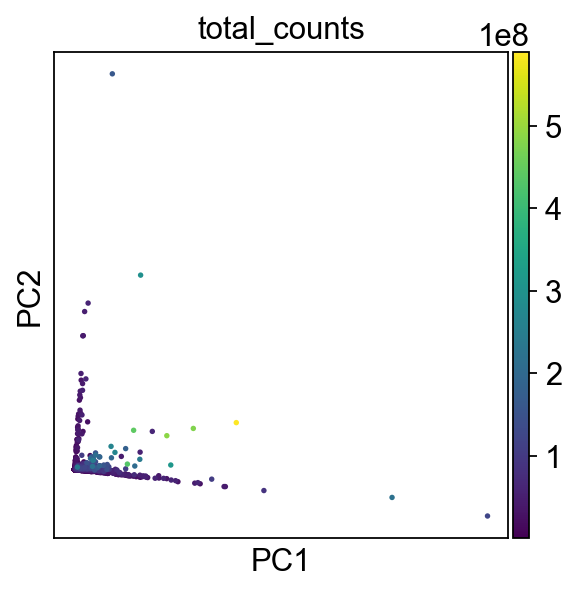

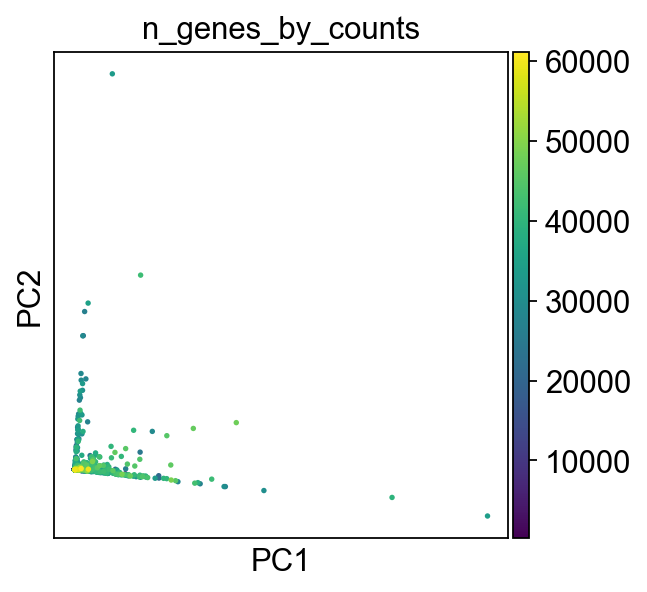

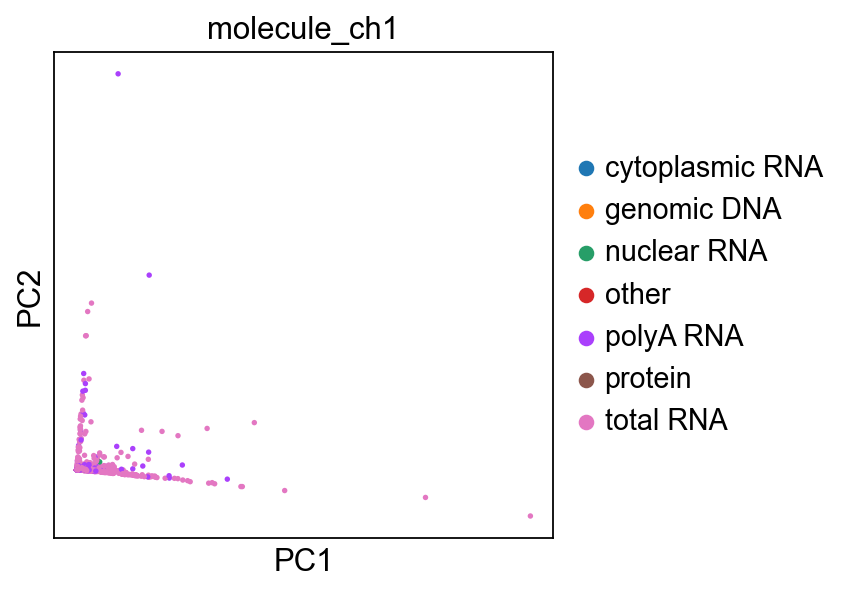

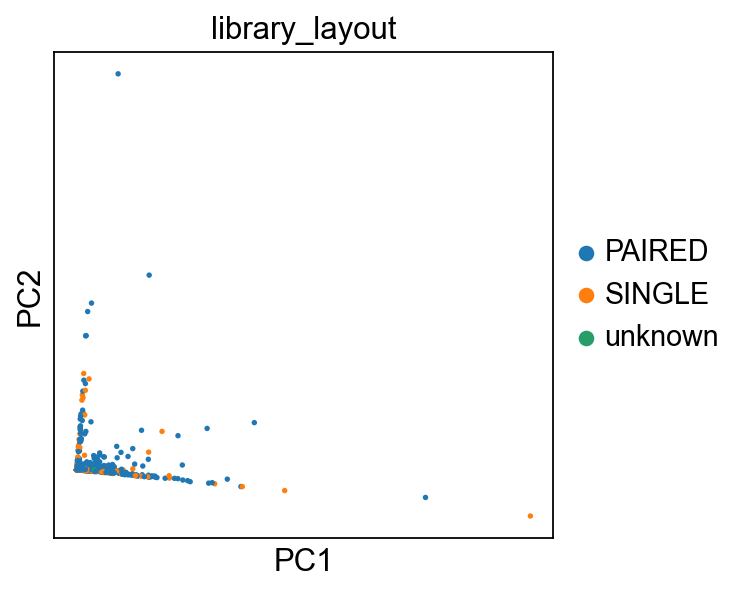

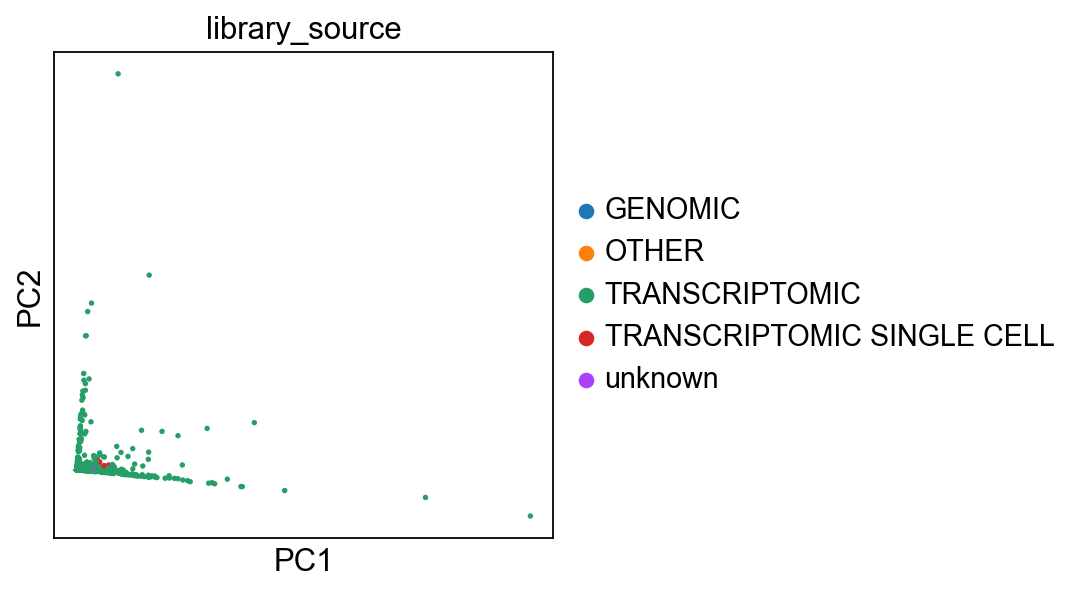

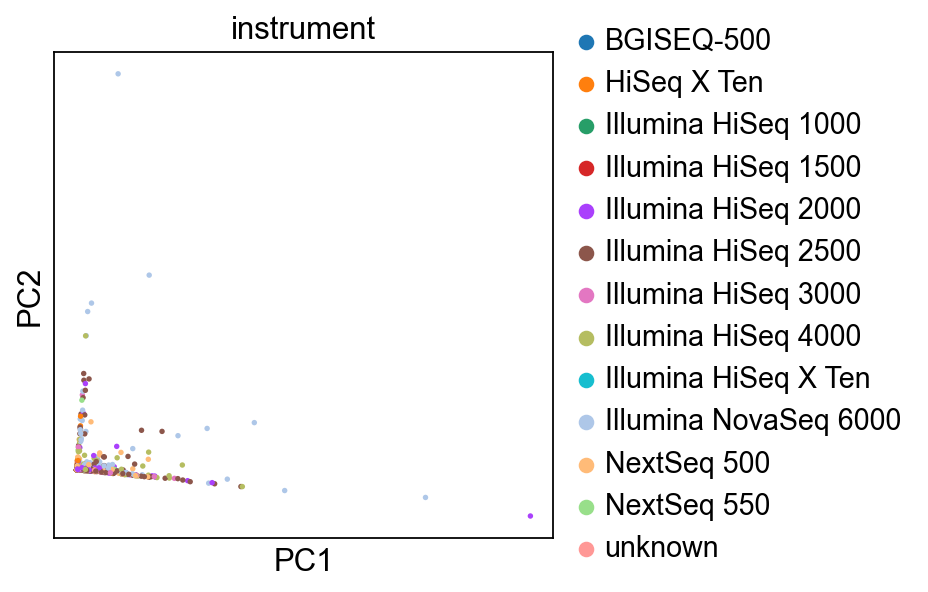

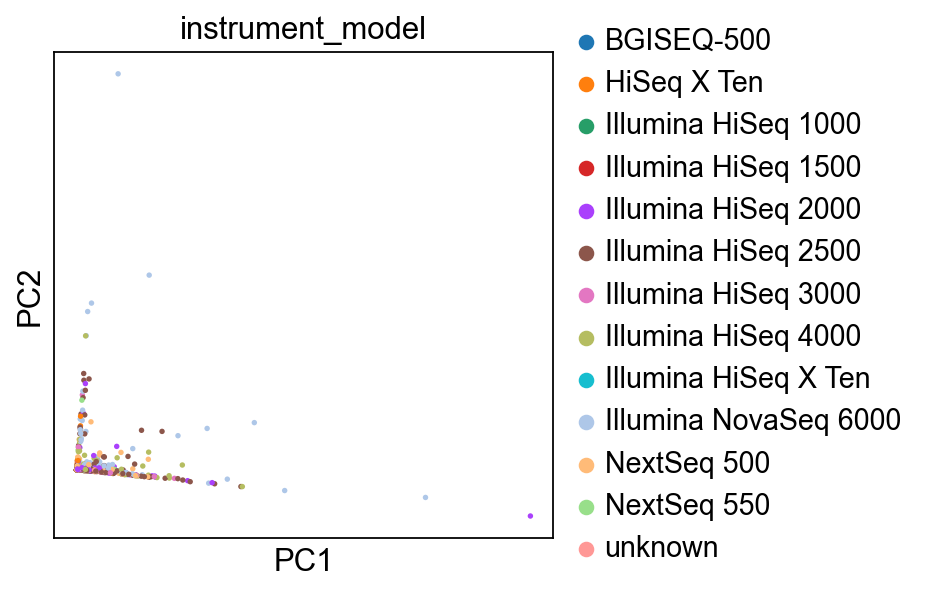

2025-04-08 15:41:48,813 - adata_hf_datasets.plotting - INFO - Generating violin plots for metrics of interest...


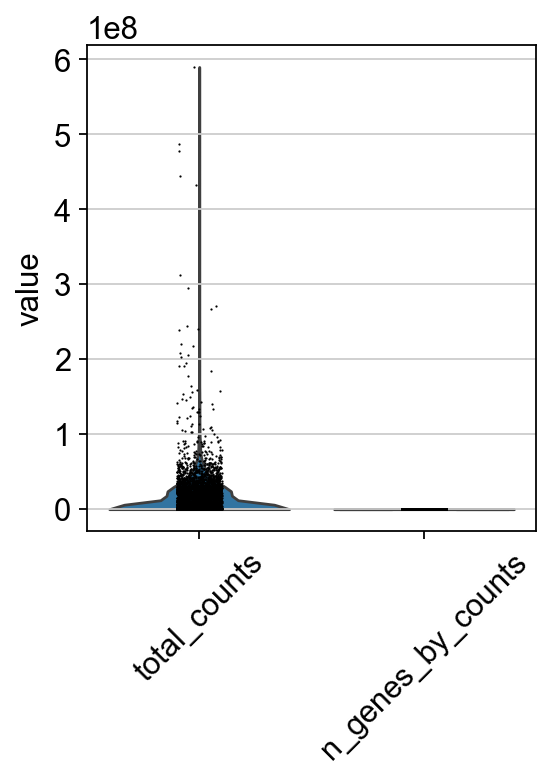

2025-04-08 15:41:48,956 - adata_hf_datasets.plotting - INFO - Generating histogram distributions for metrics of interest...


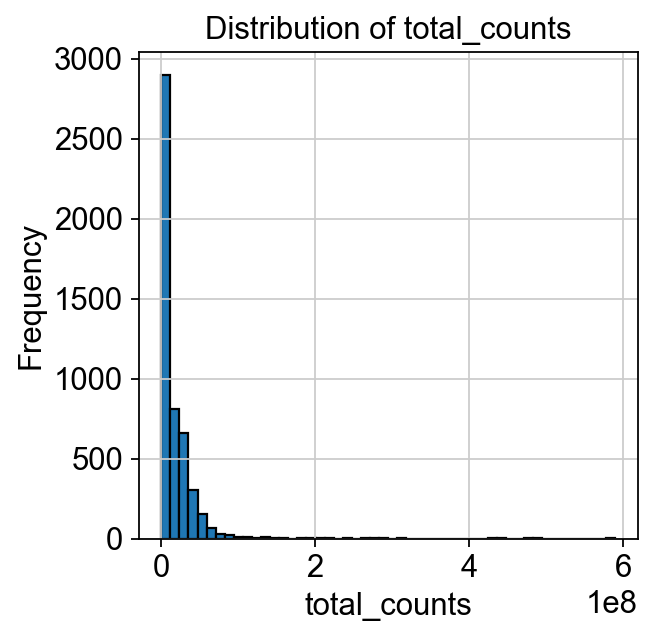

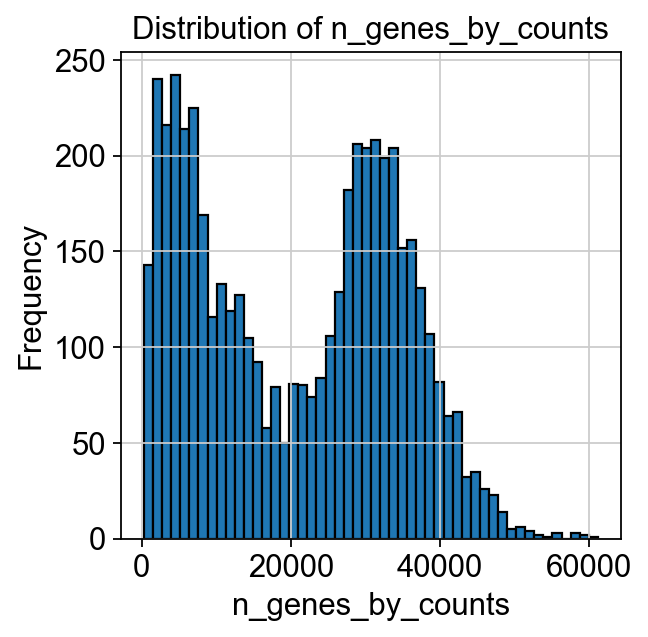

2025-04-08 15:41:49,042 - adata_hf_datasets.plotting - INFO - Generating scatter plot of total_counts vs. pct_counts_mt.


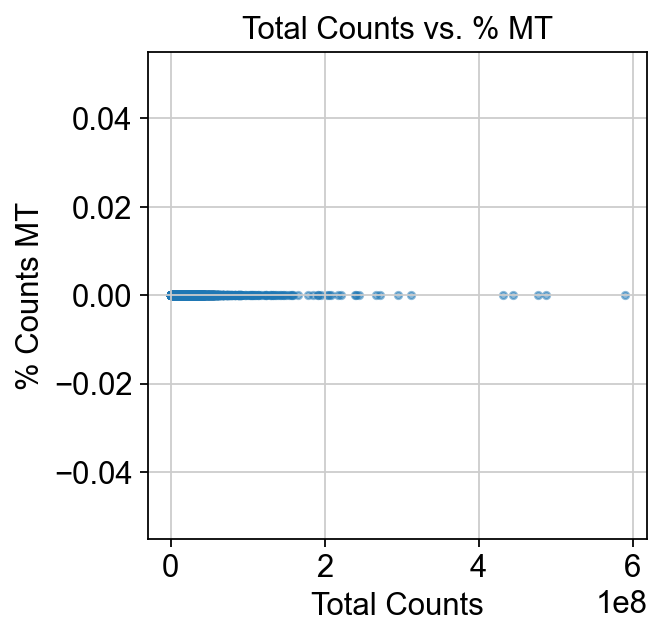

2025-04-08 15:41:49,073 - adata_hf_datasets.plotting - INFO - Investigating the effect of categorial label 'molecule_ch1'.
2025-04-08 15:41:49,073 - adata_hf_datasets.plotting - INFO - Plotting 'total_counts' by 'molecule_ch1' with violinplot.


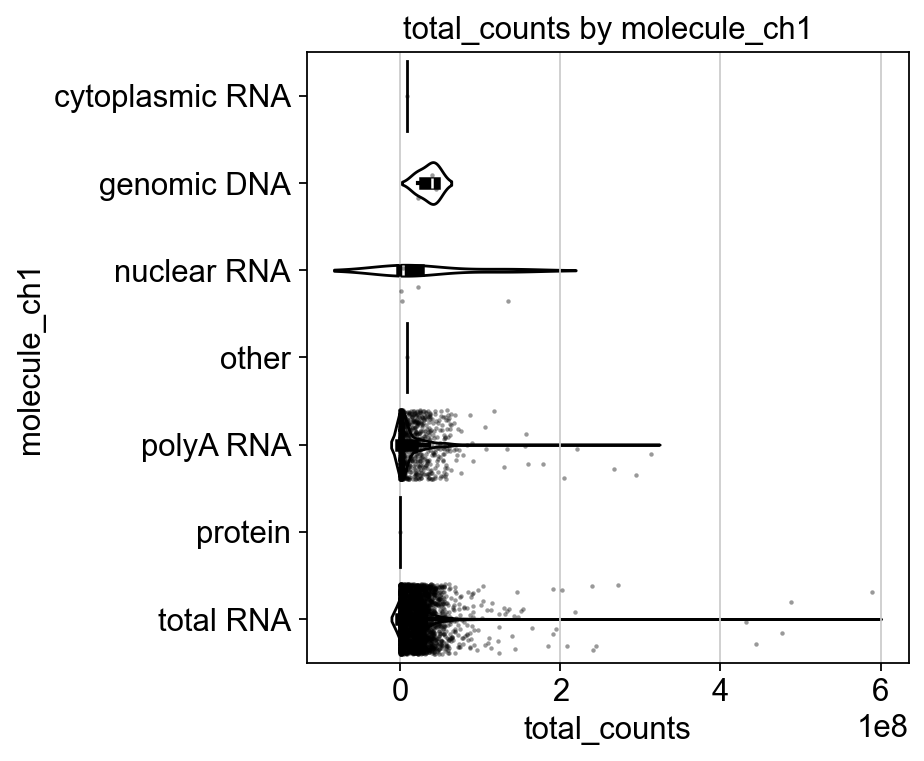

2025-04-08 15:41:49,154 - adata_hf_datasets.plotting - INFO - Plotting 'n_genes_by_counts' by 'molecule_ch1' with violinplot.


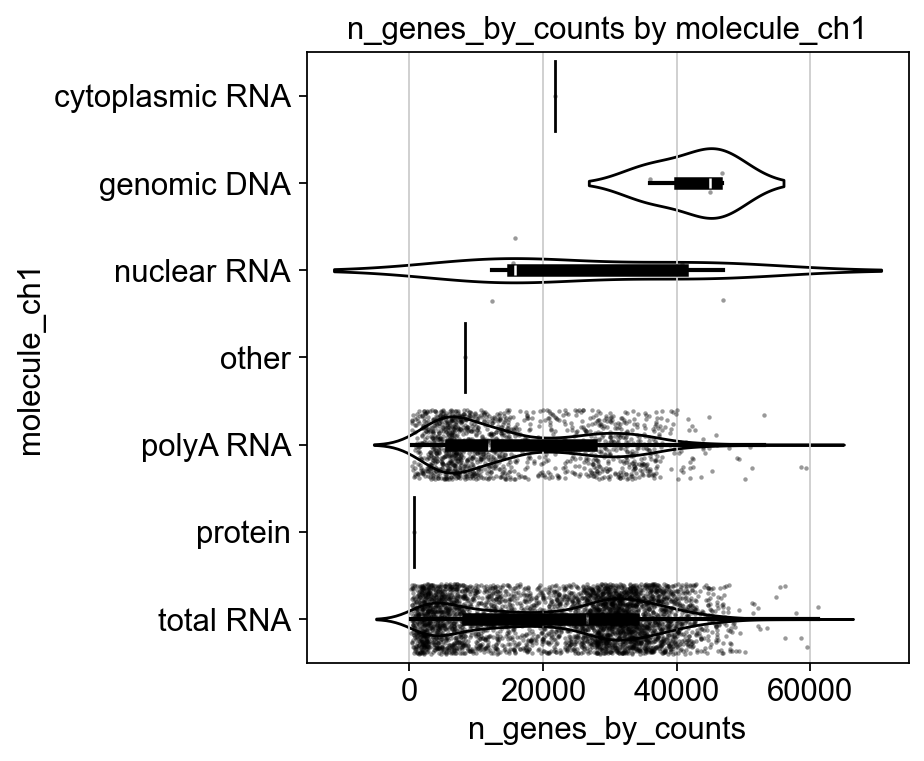

2025-04-08 15:41:49,235 - adata_hf_datasets.plotting - INFO - Investigating the effect of categorial label 'library_layout'.
2025-04-08 15:41:49,236 - adata_hf_datasets.plotting - INFO - Plotting 'total_counts' by 'library_layout' with violinplot.


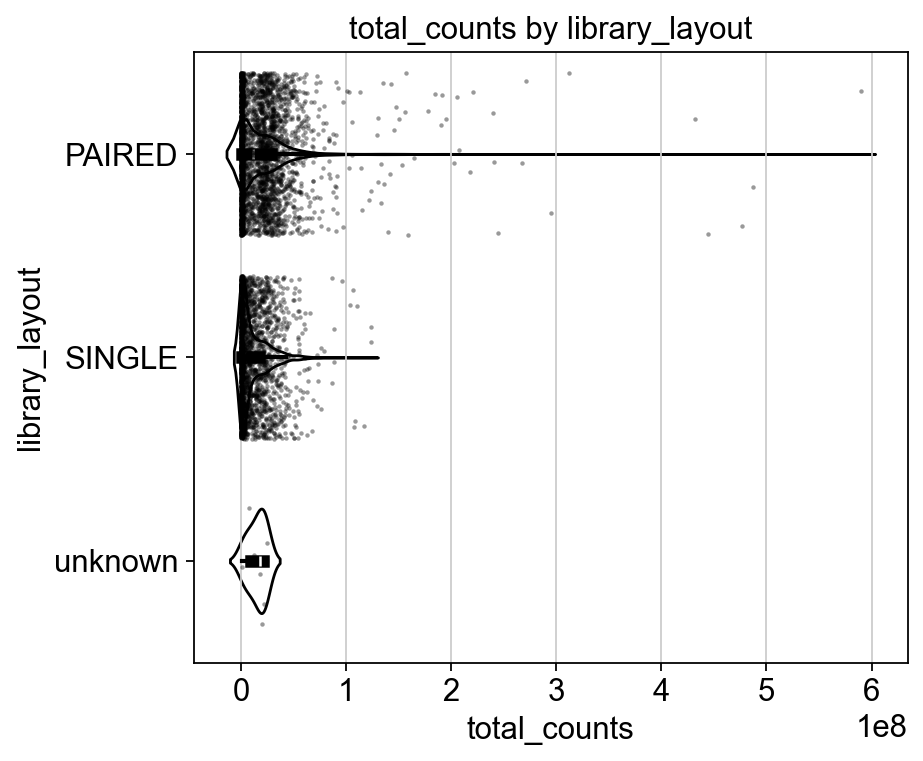

2025-04-08 15:41:49,299 - adata_hf_datasets.plotting - INFO - Plotting 'n_genes_by_counts' by 'library_layout' with violinplot.


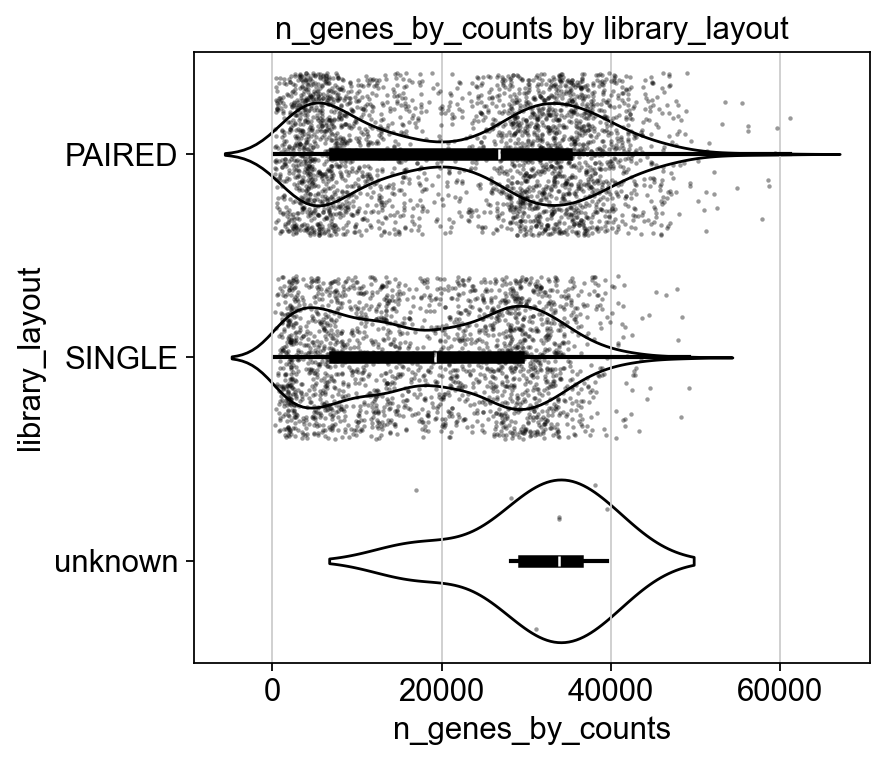

2025-04-08 15:41:49,368 - adata_hf_datasets.plotting - INFO - Investigating the effect of categorial label 'library_source'.
2025-04-08 15:41:49,369 - adata_hf_datasets.plotting - INFO - Plotting 'total_counts' by 'library_source' with violinplot.


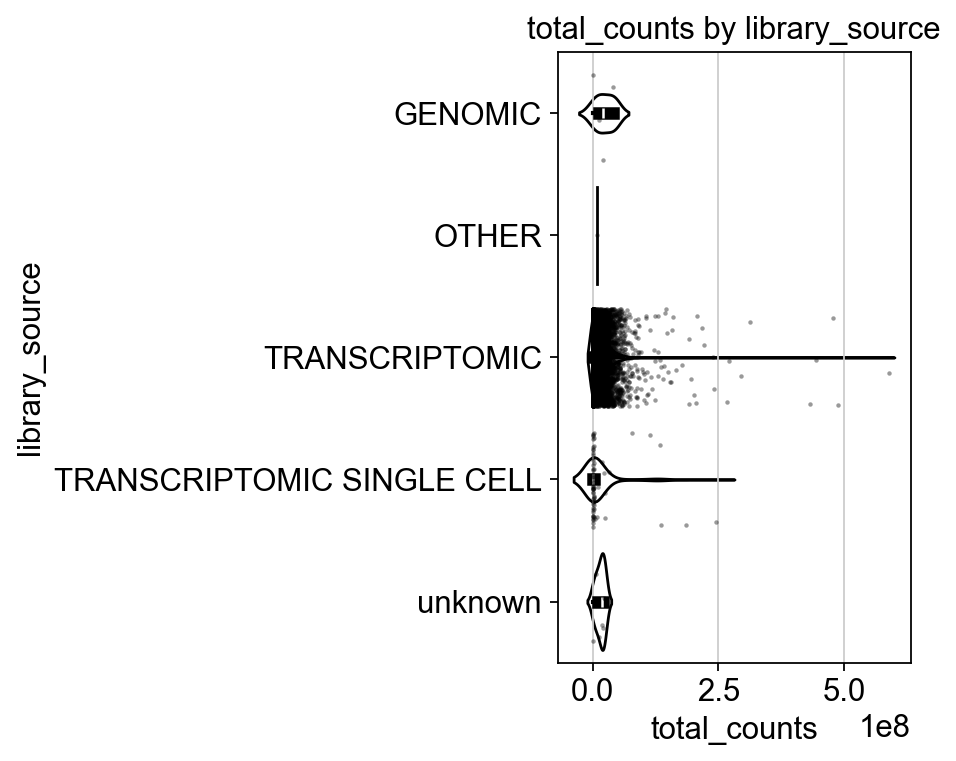

2025-04-08 15:41:49,450 - adata_hf_datasets.plotting - INFO - Plotting 'n_genes_by_counts' by 'library_source' with violinplot.


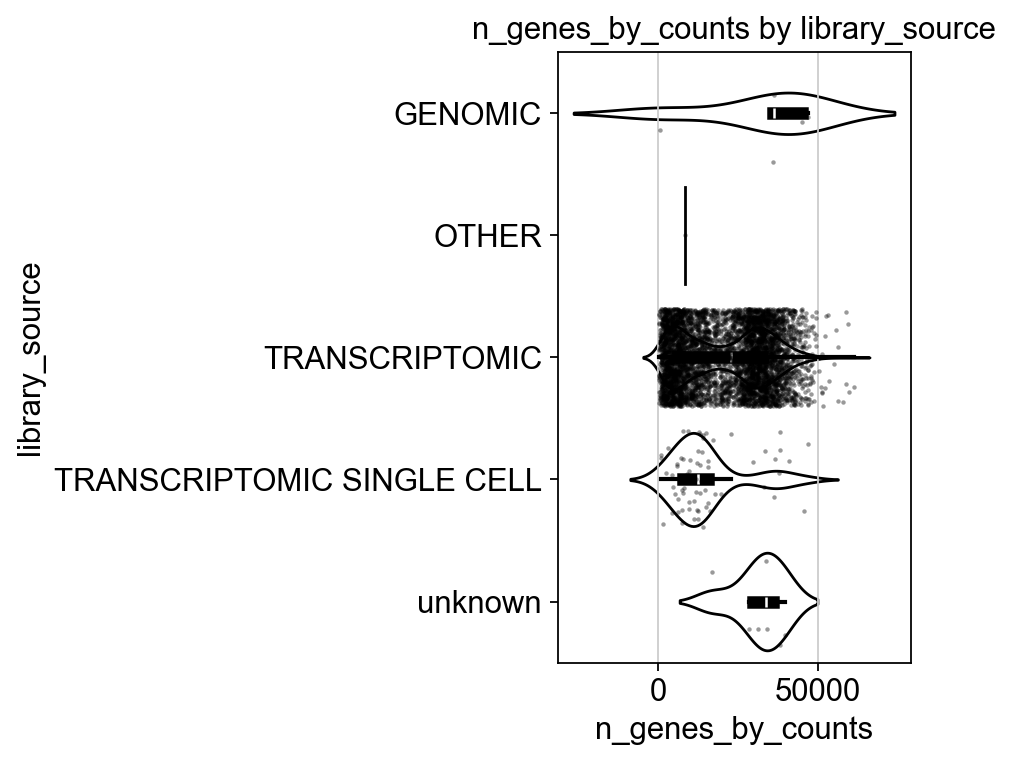

2025-04-08 15:41:49,523 - adata_hf_datasets.plotting - INFO - Investigating the effect of categorial label 'instrument'.
2025-04-08 15:41:49,523 - adata_hf_datasets.plotting - INFO - Plotting 'total_counts' by 'instrument' with violinplot.


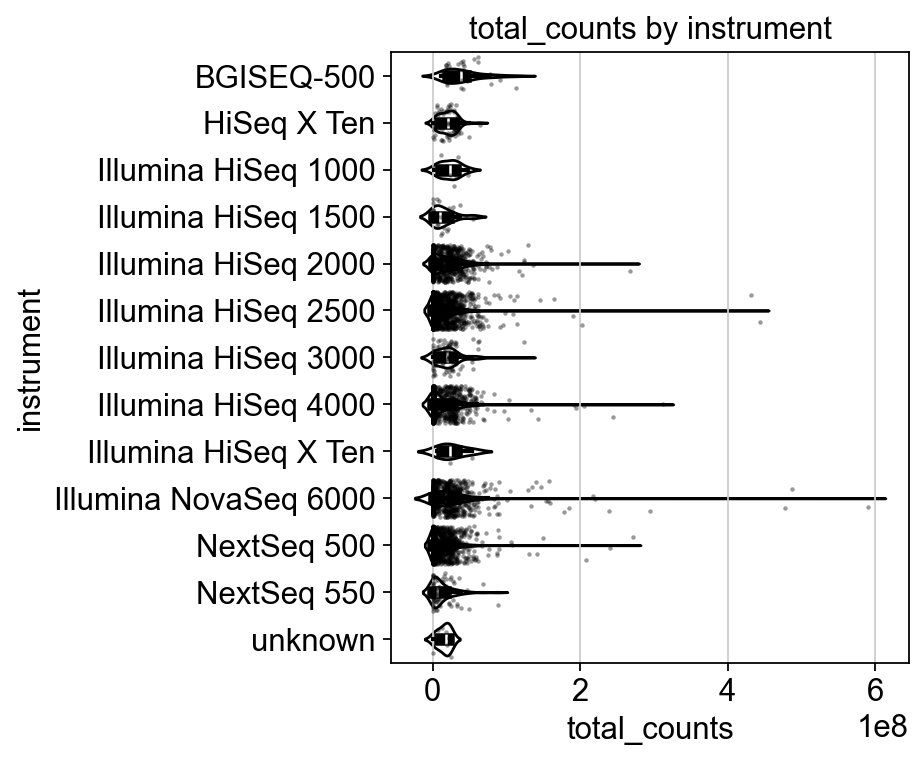

2025-04-08 15:41:49,647 - adata_hf_datasets.plotting - INFO - Plotting 'n_genes_by_counts' by 'instrument' with violinplot.


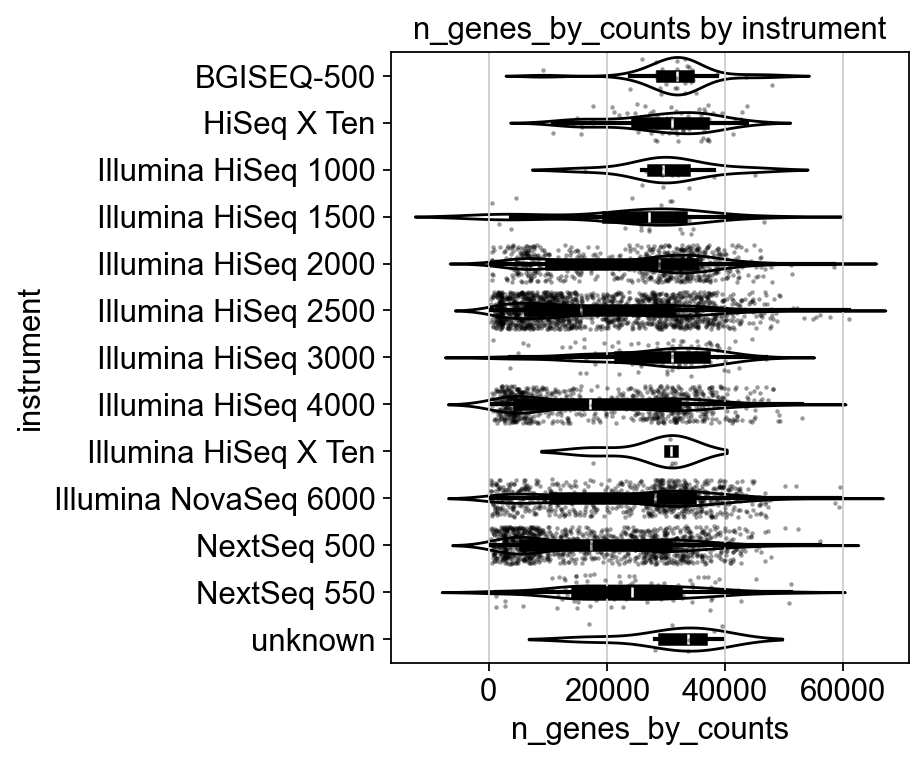

2025-04-08 15:41:49,775 - adata_hf_datasets.plotting - INFO - Investigating the effect of categorial label 'instrument_model'.
2025-04-08 15:41:49,775 - adata_hf_datasets.plotting - INFO - Plotting 'total_counts' by 'instrument_model' with violinplot.


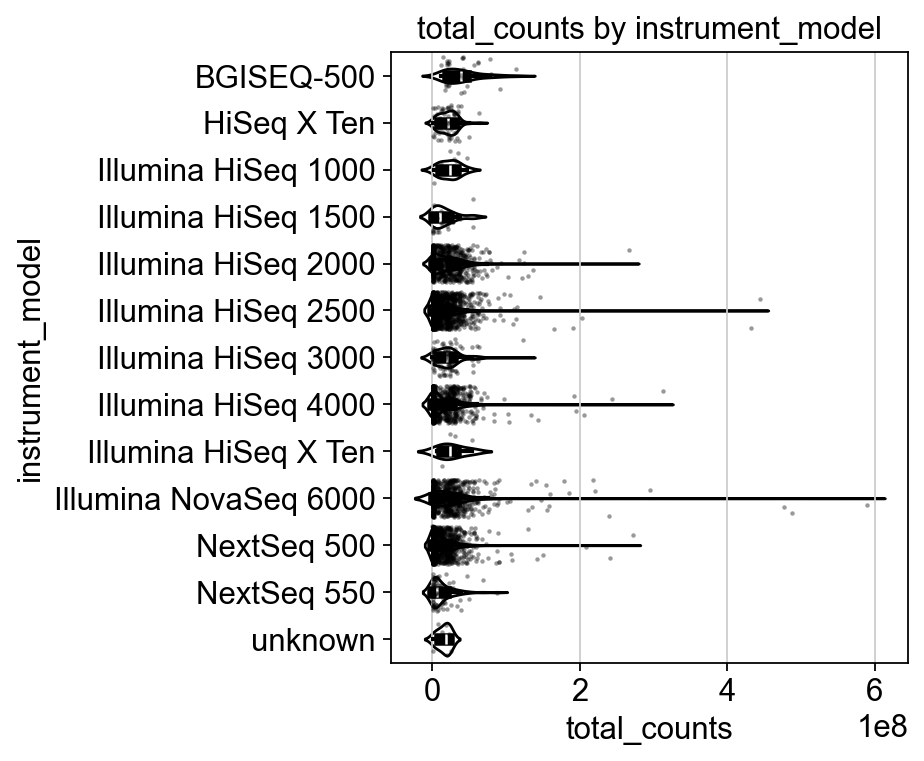

2025-04-08 15:41:49,898 - adata_hf_datasets.plotting - INFO - Plotting 'n_genes_by_counts' by 'instrument_model' with violinplot.


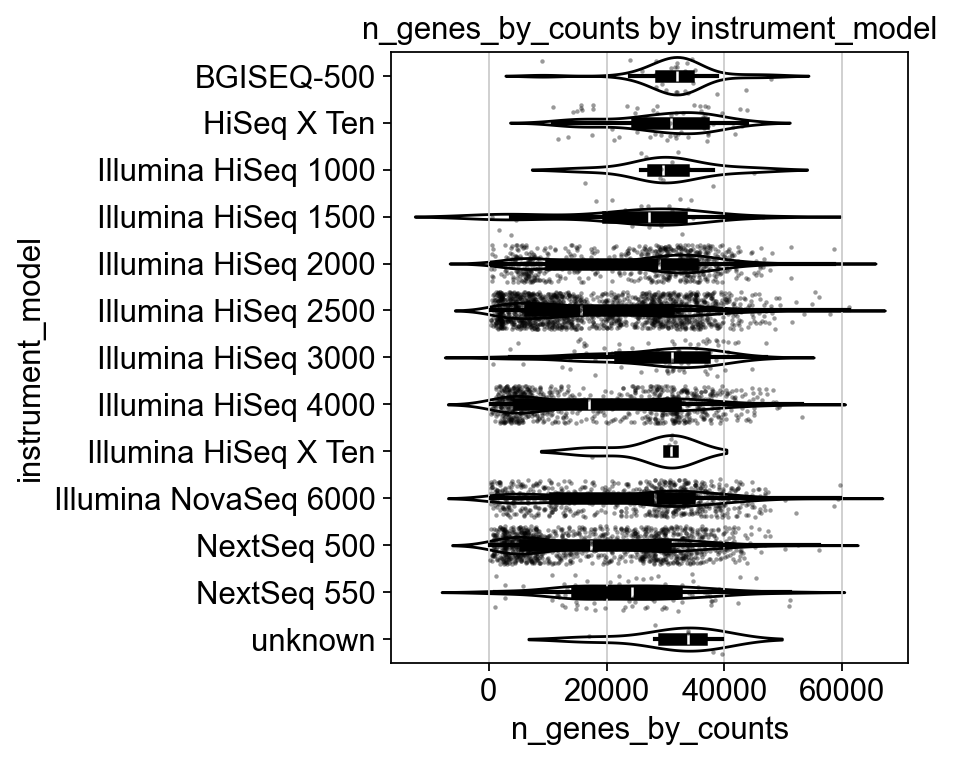

2025-04-08 15:41:50,026 - adata_hf_datasets.plotting - INFO - Finished generating QC evaluation plots.


In [202]:
from adata_hf_datasets.plotting import qc_evaluation_plots

# for geo data:
categories_of_interest = [
    "molecule_ch1",
    "library_layout",
    "library_source",
    "instrument",
    "instrument_model",
]
# categories_of_interest=["tissue","assay","dataset_title"]
qc_evaluation_plots(
    adata,
    metrics_of_interest=["total_counts", "n_genes_by_counts"],
    categories_of_interest=categories_of_interest,
    save_dir=".",
    save_plots=False,
)

In [204]:
from adata_hf_datasets.pp import pp_adata

processed_path = adata_path.replace("raw", "processed")
pp_adata(
    infile=adata_path,
    outfile=processed_path,
    category_threshold=10,
    categories=["tissue", "cell_type", "dataset_title"],
)

2025-04-08 15:42:07,614 - adata_hf_datasets.pp - INFO - Reading AnnData from ../data/RNA/raw/train/geo_7k.h5ad
2025-04-08 15:42:09,161 - adata_hf_datasets.pp - INFO - Starting quality control checks.
2025-04-08 15:42:09,161 - adata_hf_datasets.pp - INFO - Labeling mitochondrial, ribosomal, and hemoglobin genes in adata.var
2025-04-08 15:42:09,194 - adata_hf_datasets.pp - INFO - Calculating QC metrics with percent_top=[20, 50, 100], log1p=True, for gene sets [mt, ribo, hb].
2025-04-08 15:42:10,527 - adata_hf_datasets.pp - INFO - Flagging outliers for total counts, number of genes, and %% in top genes.
2025-04-08 15:42:10,529 - adata_hf_datasets.pp - INFO - Flagging outliers for mitochondrial fraction.
2025-04-08 15:42:10,948 - adata_hf_datasets.pp - INFO - Filtered out 539 cells as outliers (main or mt). Remaining cells: 6461.
2025-04-08 15:42:10,949 - adata_hf_datasets.pp - INFO - QC filtering complete.
2025-04-08 15:42:10,949 - adata_hf_datasets.pp - INFO - Starting in-memory preproce

Column tissue not found in adata_cut.obs
Column cell_type not found in adata_cut.obs
Column dataset_title not found in adata_cut.obs


2025-04-08 15:42:13,583 - adata_hf_datasets.pp - INFO - Data does not appear to be normalized. Applying sc.pp.normalize_total() in place.
2025-04-08 15:42:14,128 - adata_hf_datasets.pp - INFO - Data does not appear to be log-transformed. Applying sc.pp.log1p() in place.
2025-04-08 15:42:14,729 - adata_hf_datasets.pp - INFO - In-memory preprocessing complete.
2025-04-08 15:42:14,729 - adata_hf_datasets.pp - INFO - Preprocessing in-memory AnnData for Geneformer.
2025-04-08 15:42:14,729 - adata_hf_datasets.pp - INFO - Adding 'ensembl_id' to adata.var.
2025-04-08 15:42:14,730 - adata_hf_datasets.pp - INFO - Gene symbols are exptected to be found in .var_names. An example gene symbol: ENSG00000000003
2025-04-08 15:42:14,731 - adata_hf_datasets.pp - INFO - Directly storing Ensembl IDs from row index in adata.var['ensembl_id'].
2025-04-08 15:42:14,731 - adata_hf_datasets.pp - INFO - Calculating n_counts, which requires scanning the data once.
2025-04-08 15:42:15,613 - adata_hf_datasets.pp - I

2025-04-08 15:42:17,159 - adata_hf_datasets.plotting - INFO - Starting QC evaluation plots.
2025-04-08 15:42:17,160 - adata_hf_datasets.plotting - INFO - Subsetting data from 6461 cells to 5000 cells.
2025-04-08 15:42:17,475 - adata_hf_datasets.plotting - INFO - Labeling known QC genes (mt, ribo, hb) if not already labeled.
2025-04-08 15:42:17,475 - adata_hf_datasets.plotting - INFO - Calculating QC metrics with qc_vars=['mt', 'ribo', 'hb'], percent_top=[20], log1p=True
2025-04-08 15:42:18,135 - adata_hf_datasets.plotting - INFO - Metrics of interest for plotting: ['total_counts', 'n_genes_by_counts']
2025-04-08 15:42:18,135 - adata_hf_datasets.plotting - INFO - Running PCA for the subset data. This is a quick approximate check.
2025-04-08 15:42:48,371 - adata_hf_datasets.plotting - INFO - Generating PCA plots for metrics of interest...


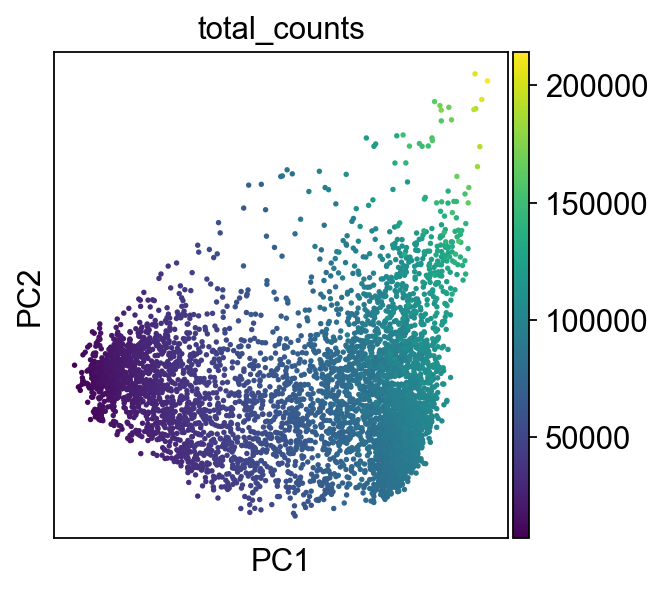

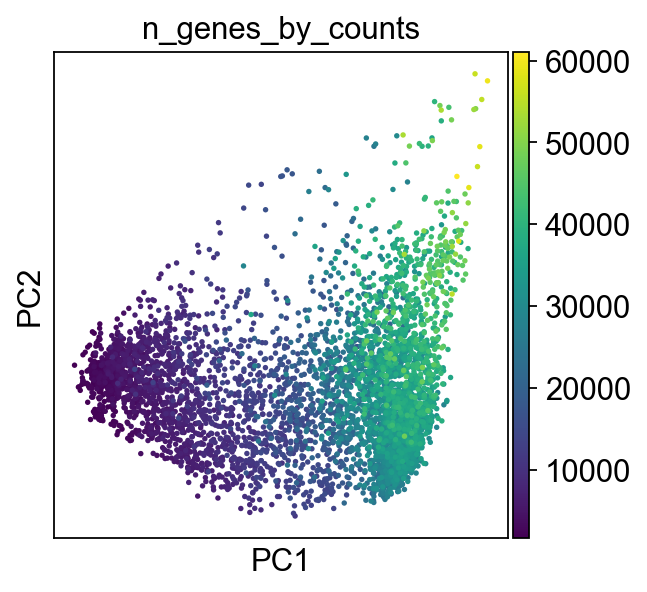

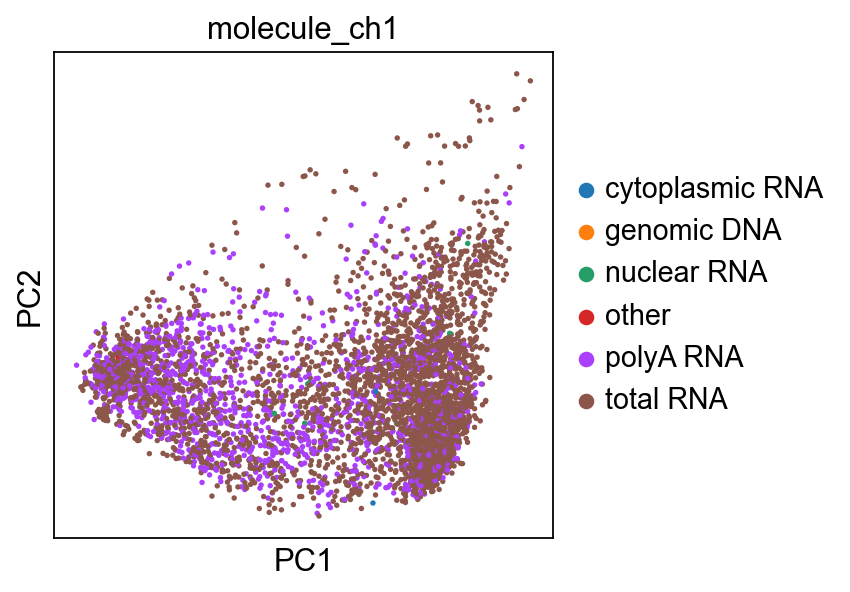

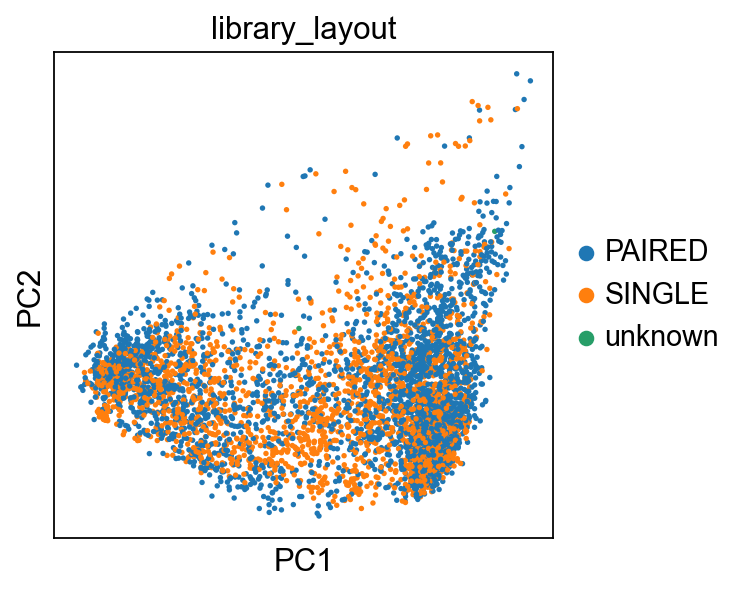

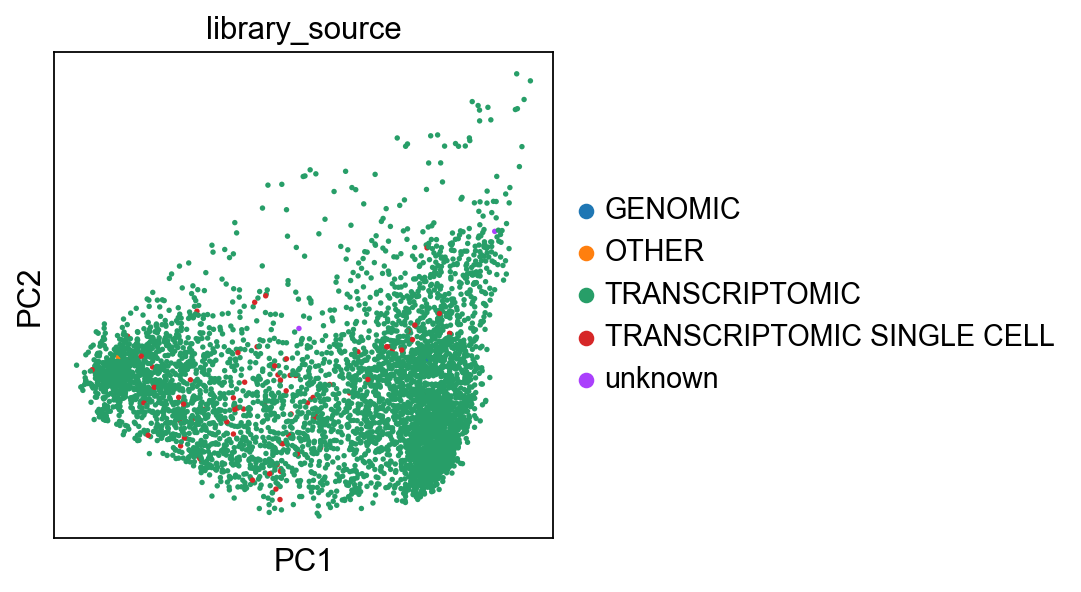

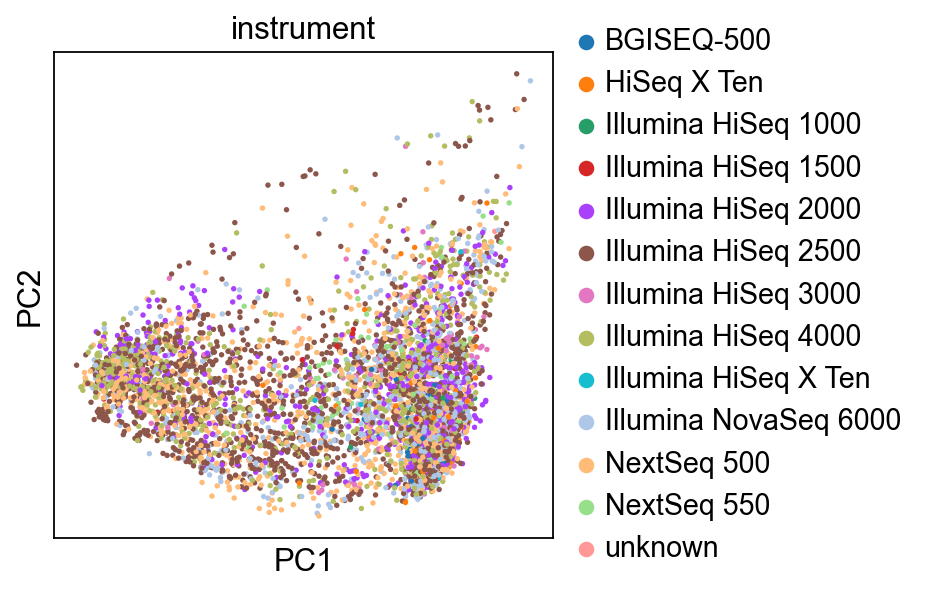

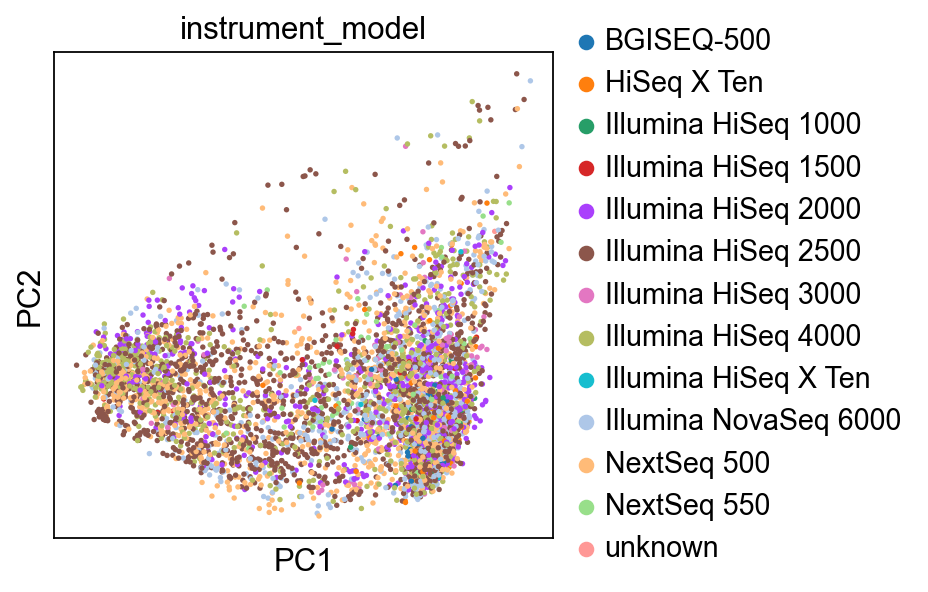

2025-04-08 15:42:49,594 - adata_hf_datasets.plotting - INFO - Generating violin plots for metrics of interest...


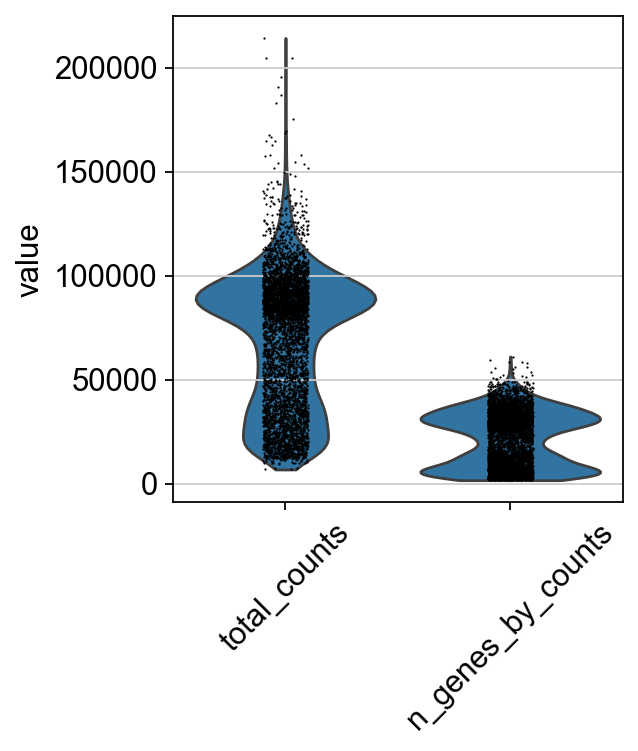

2025-04-08 15:42:49,763 - adata_hf_datasets.plotting - INFO - Generating histogram distributions for metrics of interest...


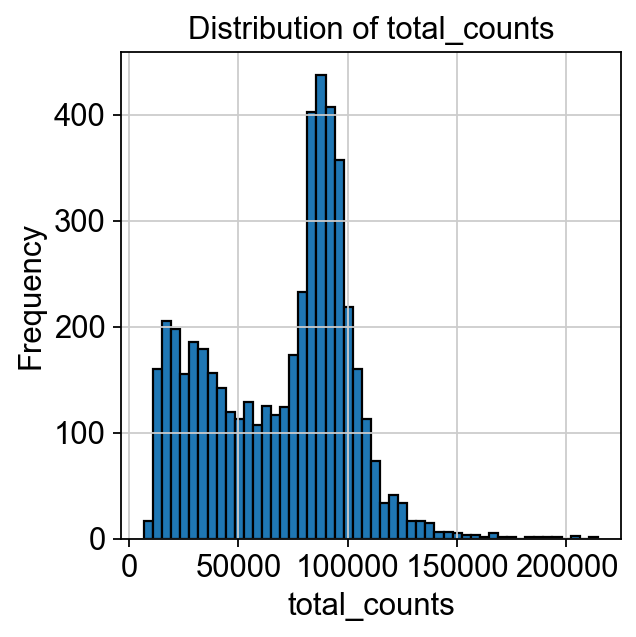

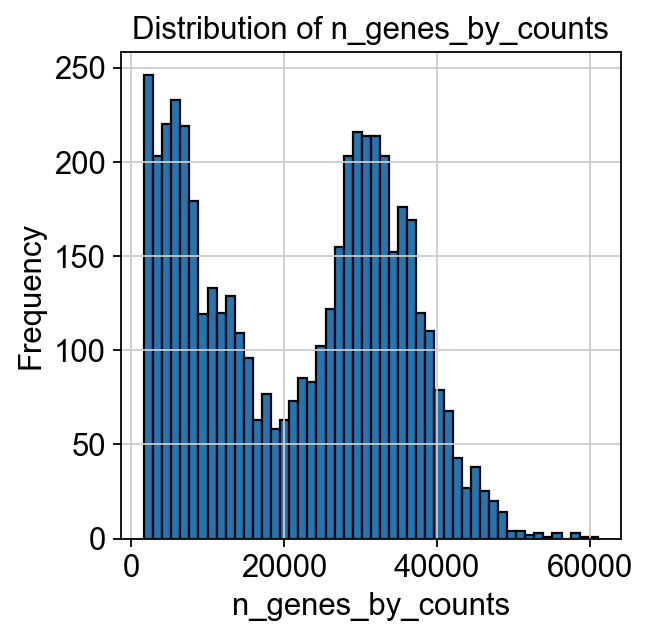

2025-04-08 15:42:49,849 - adata_hf_datasets.plotting - INFO - Generating scatter plot of total_counts vs. pct_counts_mt.


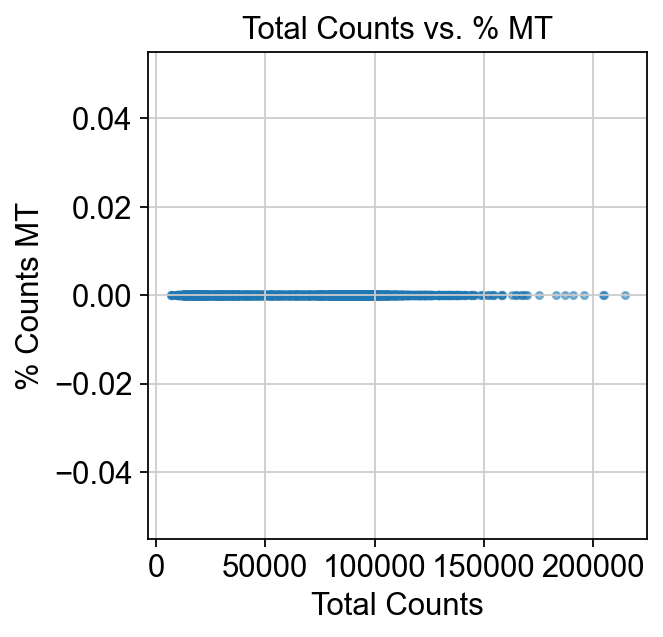

2025-04-08 15:42:49,885 - adata_hf_datasets.plotting - INFO - Investigating the effect of categorial label 'molecule_ch1'.
2025-04-08 15:42:49,885 - adata_hf_datasets.plotting - INFO - Plotting 'total_counts' by 'molecule_ch1' with violinplot.


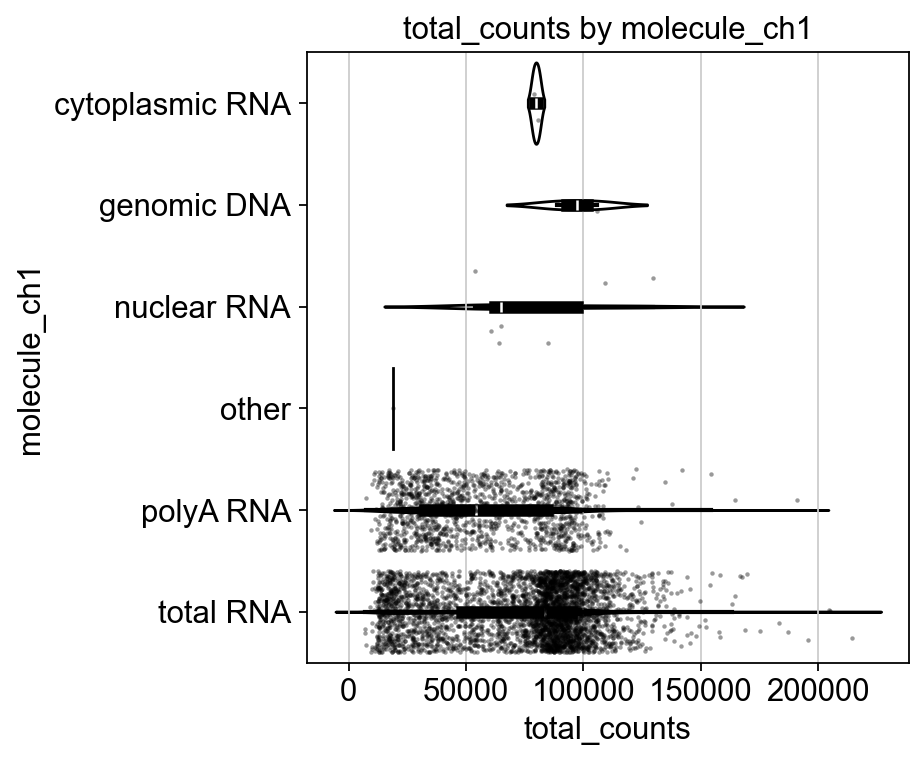

2025-04-08 15:42:49,964 - adata_hf_datasets.plotting - INFO - Plotting 'n_genes_by_counts' by 'molecule_ch1' with violinplot.


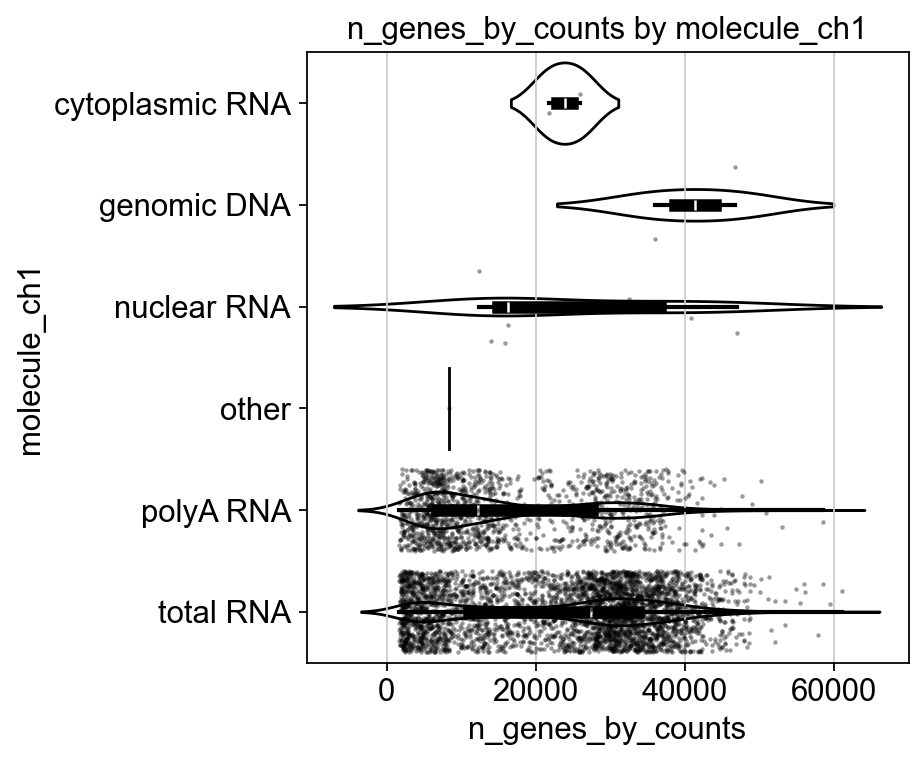

2025-04-08 15:42:50,045 - adata_hf_datasets.plotting - INFO - Investigating the effect of categorial label 'library_layout'.
2025-04-08 15:42:50,045 - adata_hf_datasets.plotting - INFO - Plotting 'total_counts' by 'library_layout' with violinplot.


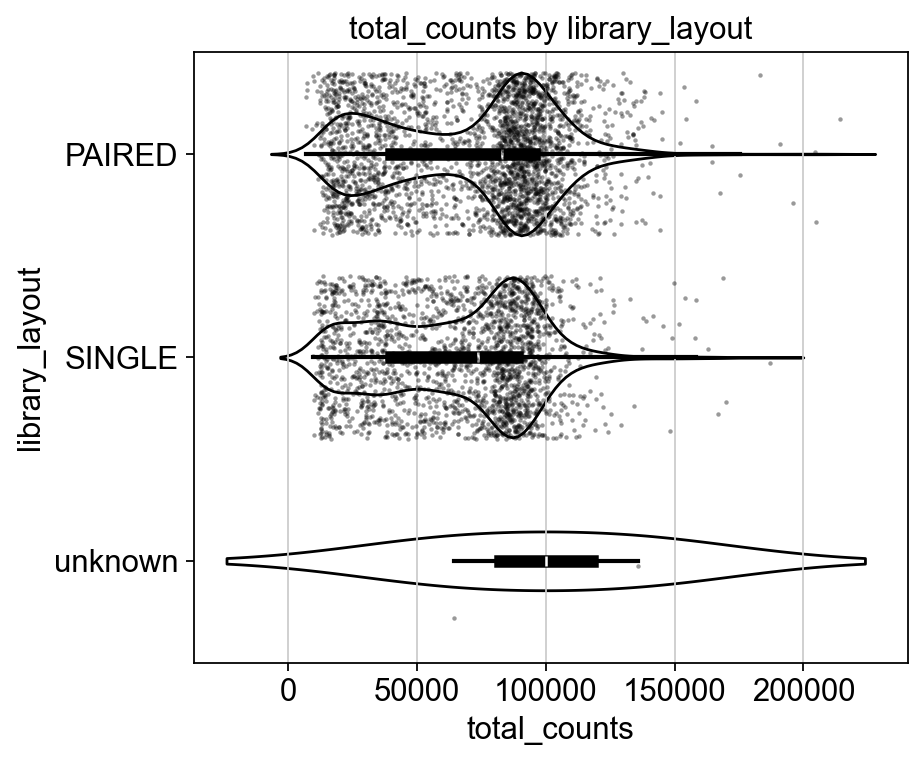

2025-04-08 15:42:50,109 - adata_hf_datasets.plotting - INFO - Plotting 'n_genes_by_counts' by 'library_layout' with violinplot.


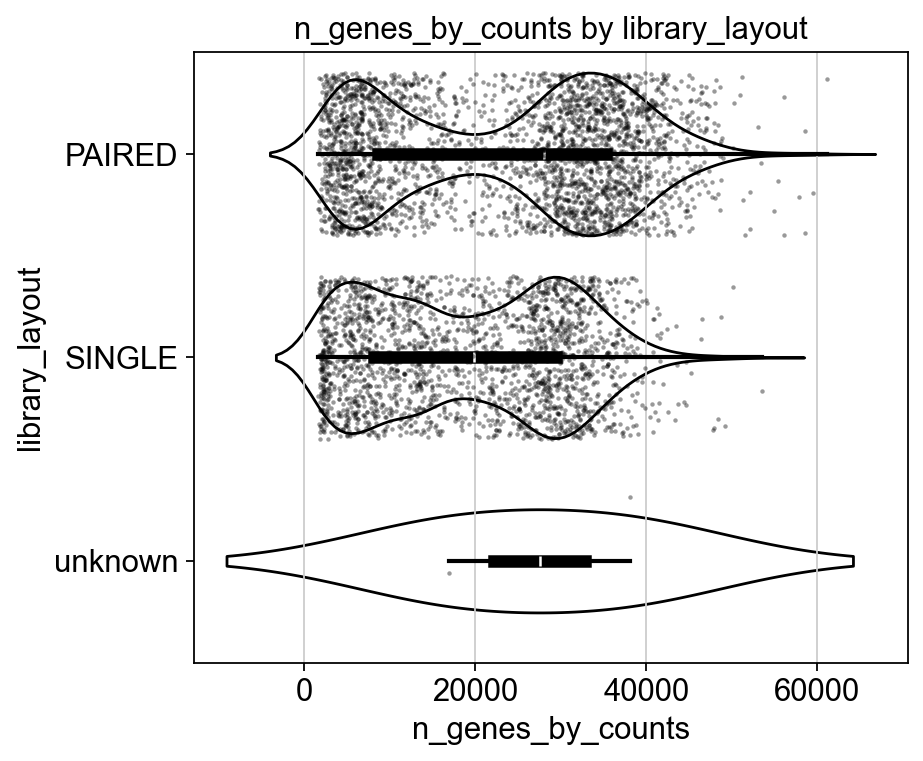

2025-04-08 15:42:50,176 - adata_hf_datasets.plotting - INFO - Investigating the effect of categorial label 'library_source'.
2025-04-08 15:42:50,176 - adata_hf_datasets.plotting - INFO - Plotting 'total_counts' by 'library_source' with violinplot.


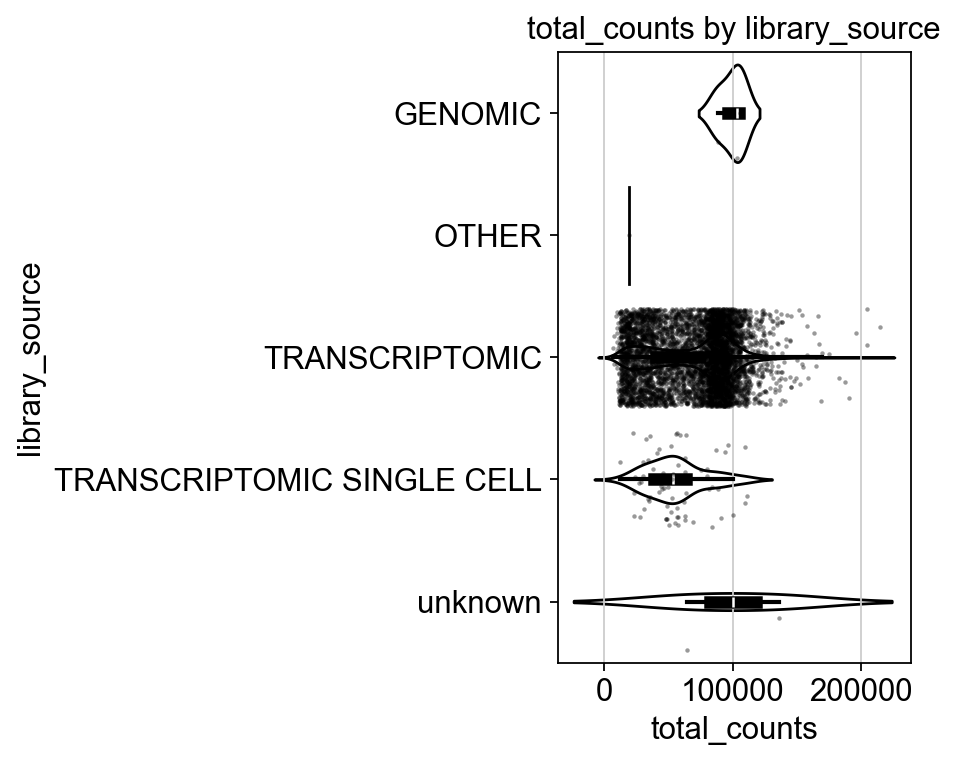

2025-04-08 15:42:50,248 - adata_hf_datasets.plotting - INFO - Plotting 'n_genes_by_counts' by 'library_source' with violinplot.


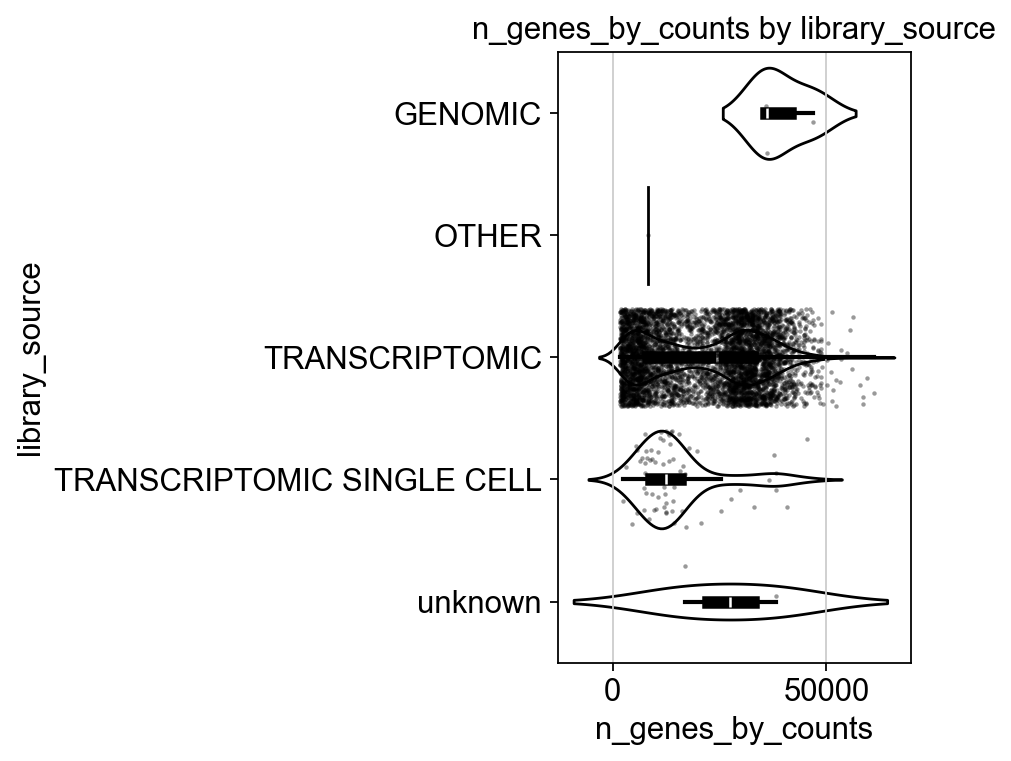

2025-04-08 15:42:50,320 - adata_hf_datasets.plotting - INFO - Investigating the effect of categorial label 'instrument'.
2025-04-08 15:42:50,320 - adata_hf_datasets.plotting - INFO - Plotting 'total_counts' by 'instrument' with violinplot.


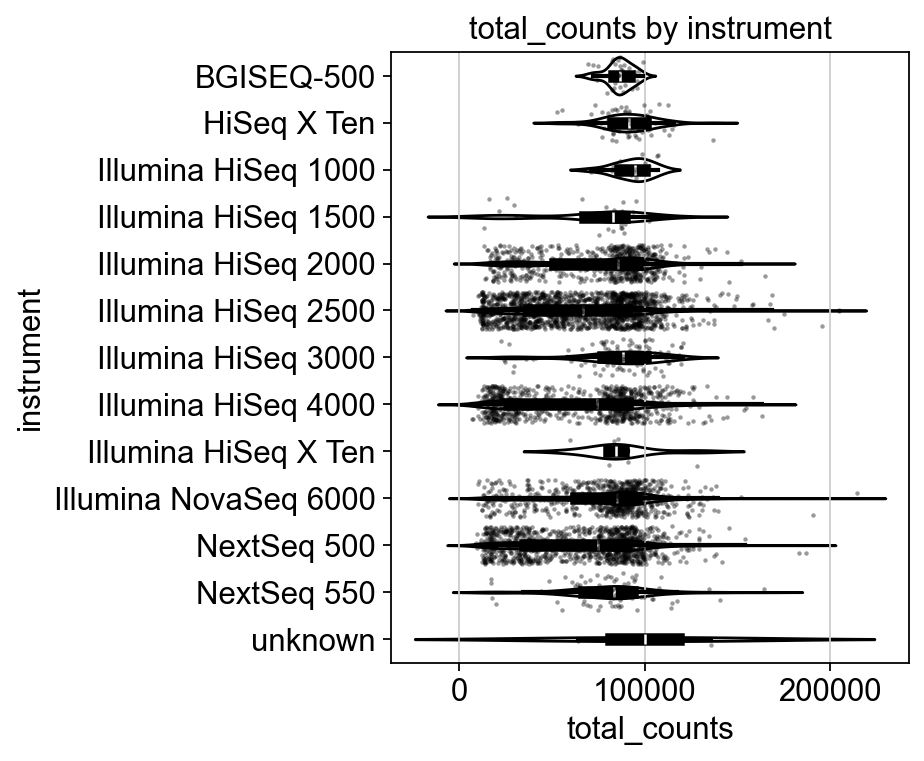

2025-04-08 15:42:50,449 - adata_hf_datasets.plotting - INFO - Plotting 'n_genes_by_counts' by 'instrument' with violinplot.


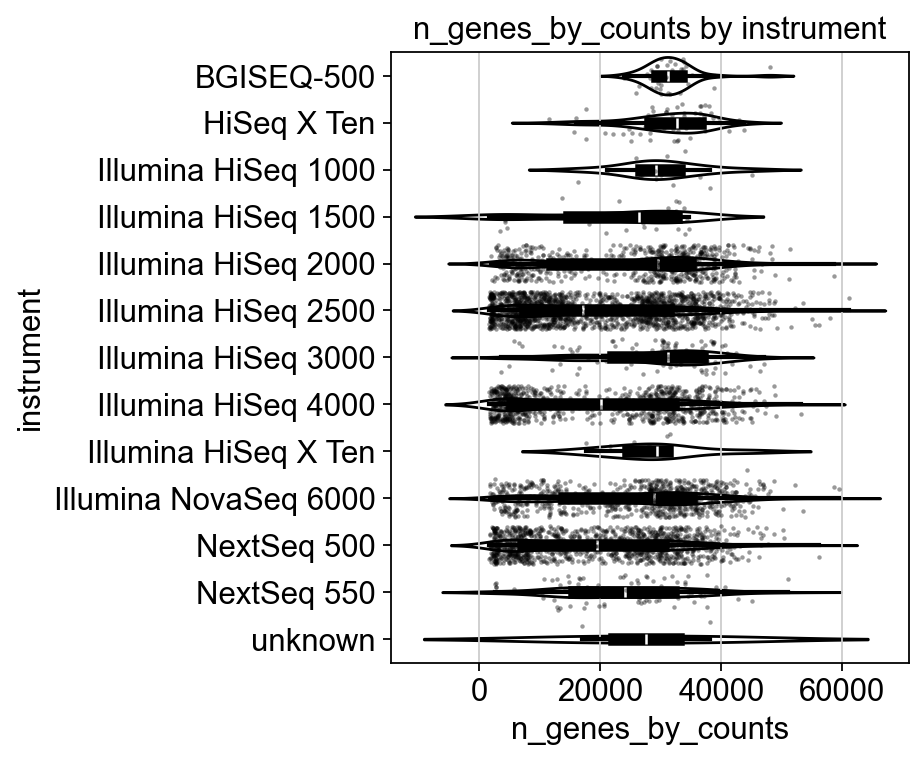

2025-04-08 15:42:50,577 - adata_hf_datasets.plotting - INFO - Investigating the effect of categorial label 'instrument_model'.
2025-04-08 15:42:50,577 - adata_hf_datasets.plotting - INFO - Plotting 'total_counts' by 'instrument_model' with violinplot.


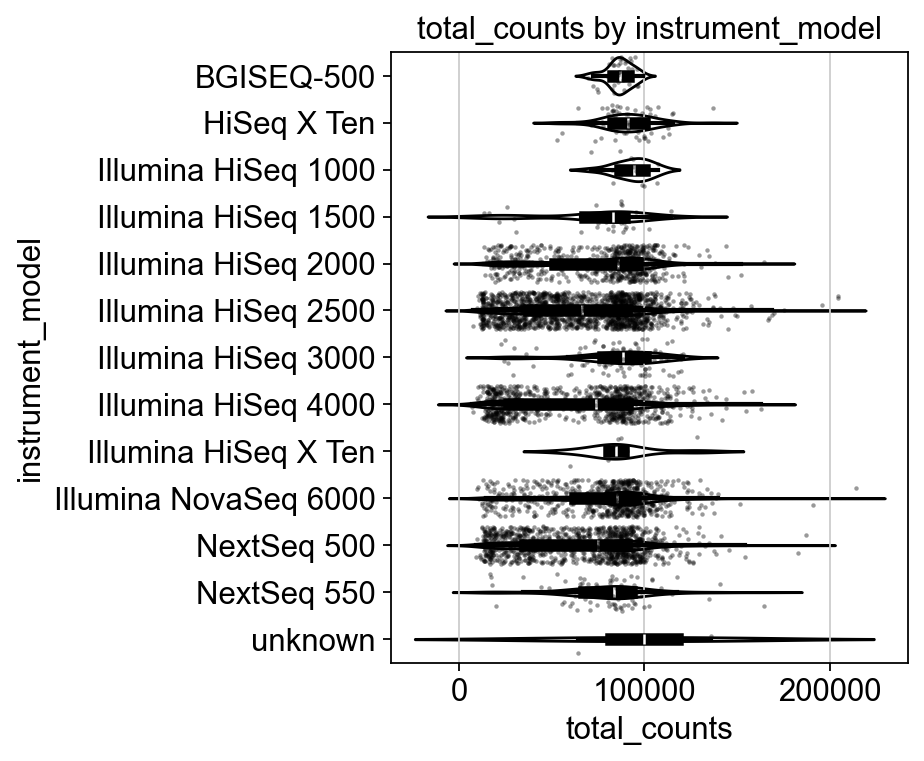

2025-04-08 15:42:50,704 - adata_hf_datasets.plotting - INFO - Plotting 'n_genes_by_counts' by 'instrument_model' with violinplot.


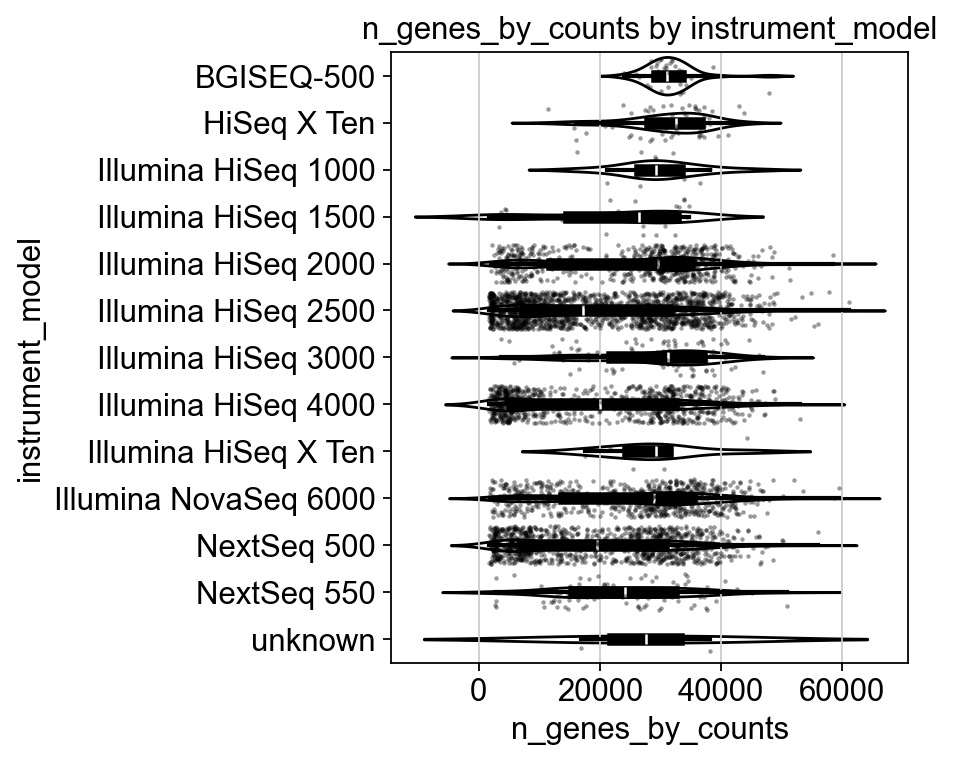

2025-04-08 15:42:50,855 - adata_hf_datasets.plotting - INFO - Finished generating QC evaluation plots.


In [205]:
adata_pp = anndata.read_h5ad(processed_path)
qc_evaluation_plots(
    adata_pp,
    metrics_of_interest=["total_counts", "n_genes_by_counts"],
    categories_of_interest=categories_of_interest,
    save_dir=".",
    save_plots=False,
)

In [47]:
import logging
import matplotlib.pyplot as plt
import anndata

logger = logging.getLogger(__name__)


def scatter_reads_vs_metric(
    adata: anndata.AnnData,
    x_key: str = "readsaligned",
    y_key: str = "total_counts",
    max_points: int = 2000,
    log_scale_x: bool = False,
    log_scale_y: bool = False,
):
    """
    Creates a scatter plot of two numeric columns in `adata.obs`, by default
    'readsaligned' vs. 'total_counts'. Subsamples to `max_points` for large datasets.

    Parameters
    ----------
    adata : anndata.AnnData
        AnnData object containing single-cell or bulk RNA-seq data. Must have
        the columns `x_key` and `y_key` in `adata.obs`.
    x_key : str, optional
        The key in `adata.obs` for the x-axis (e.g., 'readsaligned').
    y_key : str, optional
        The key in `adata.obs` for the y-axis (e.g., 'total_counts' or 'n_genes_by_counts').
    max_points : int, optional
        Maximum number of samples (rows) to plot. If your dataset is larger,
        it will be randomly subsampled to this many points.
    log_scale_x : bool, optional
        Whether to apply a log scale to the x-axis.
    log_scale_y : bool, optional
        Whether to apply a log scale to the y-axis.

    References
    ----------
    Data source:
        Typically, 'readsaligned' might come from metadata indicating
        total mapped reads per sample.
        'total_counts' or 'n_genes_by_counts' come from sc.pp.calculate_qc_metrics
        or your custom pipeline.

    Examples
    --------
    >>> scatter_reads_vs_metric(adata, x_key="readsaligned", y_key="total_counts")
    """
    if x_key not in adata.obs.columns:
        raise ValueError(f"{x_key} not found in adata.obs.")
    if y_key not in adata.obs.columns:
        raise ValueError(f"{y_key} not found in adata.obs.")

    logger.info("Preparing scatter plot of '%s' vs. '%s'.", x_key, y_key)

    # Extract the arrays
    x_vals = adata.obs[x_key].values
    y_vals = adata.obs[y_key].values
    n_samples = len(x_vals)

    logger.info("Total samples in dataset: %d", n_samples)
    if n_samples > max_points:
        idx = np.random.choice(n_samples, max_points, replace=False)
        logger.info("Subsampling to %d points for plotting.", max_points)
        x_vals = x_vals[idx]
        y_vals = y_vals[idx]

    plt.figure(figsize=(6, 5))
    plt.scatter(x_vals, y_vals, alpha=0.6, s=20, edgecolor="none")

    plt.xlabel(x_key)
    plt.ylabel(y_key)

    if log_scale_x:
        plt.xscale("log")
    if log_scale_y:
        plt.yscale("log")

    plt.title(f"{x_key} vs. {y_key}")
    plt.tight_layout()

    plt.show()

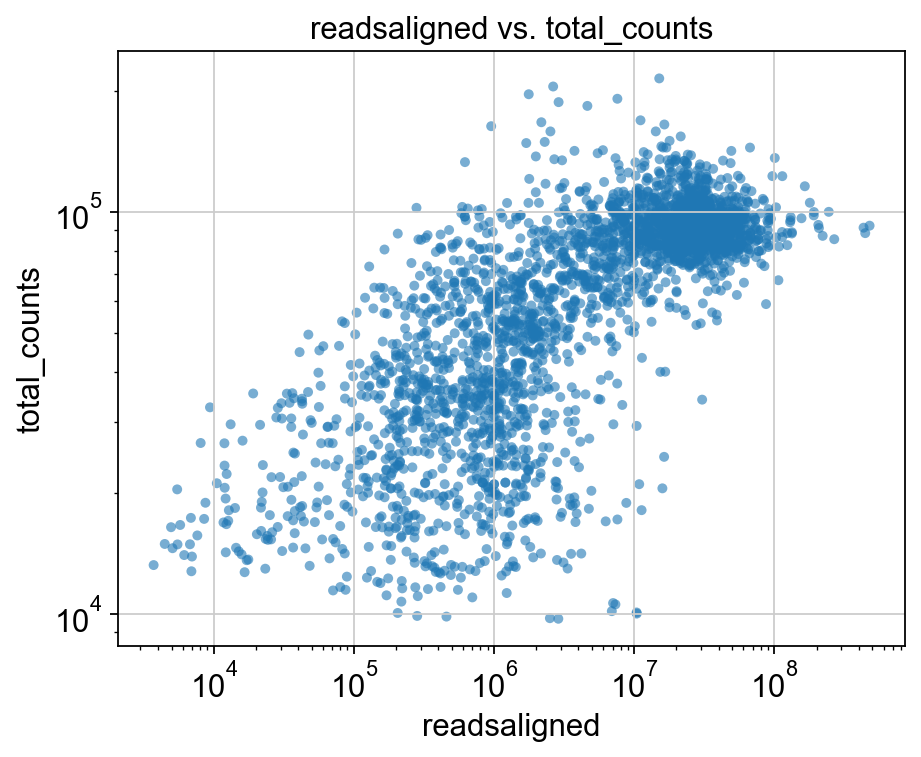

In [48]:
scatter_reads_vs_metric(
    adata_pp,
    x_key="readsaligned",
    y_key="total_counts",
    max_points=3000,
    log_scale_x=True,
    log_scale_y=True,
)

In [53]:
sc.pp.calculate_qc_metrics(adata, inplace=True)

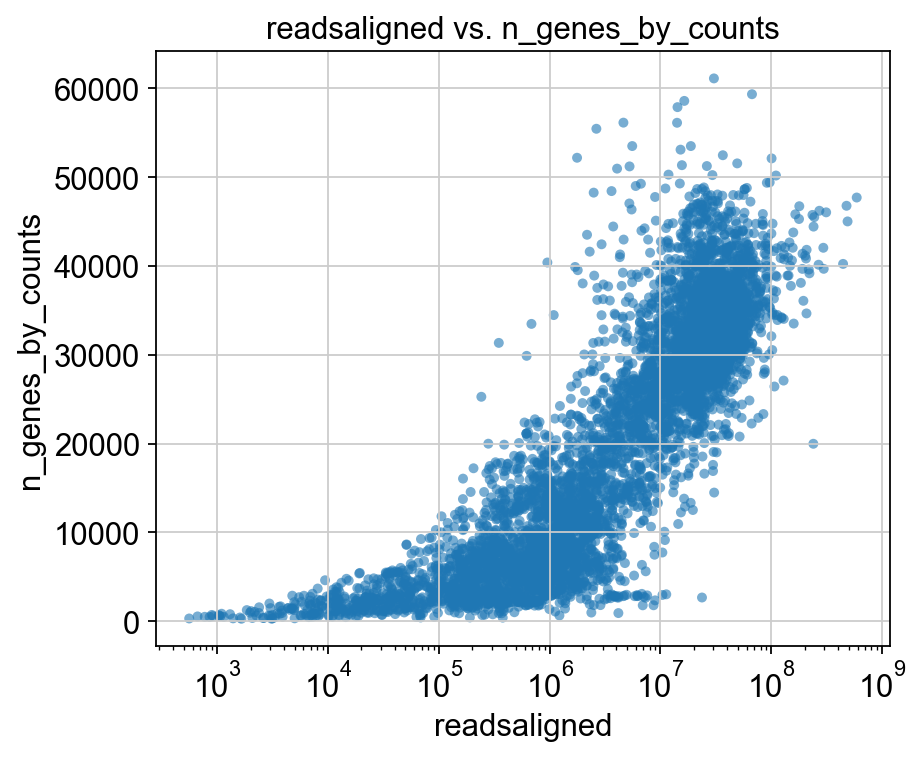

In [63]:
scatter_reads_vs_metric(
    adata,
    x_key="readsaligned",
    y_key="n_genes_by_counts",
    max_points=6000,
    log_scale_x=True,
    log_scale_y=False,
)